## Second level heading

This cell contains simple
[markdown](https://daringfireball.net/projects/markdown/syntax), a simple language for writing text that can be automatically converted to other formats, e.g. HTML, LaTeX or any of a number of others.

**Bold**, *italics*, **_combined_**, ~~strikethrough~~, `inline code`.

* bullet points

or

1. numbered
3. lists

**Equations:**
inline $e^{i\pi} + 1 = 0$
or on new line
$$e^{i\pi} + 1 = 0$$

Images:

![Jupyter logo](https://jupyter.org/assets/homepage/main-logo.svg)

Links:
[One of many markdown cheat-sheets](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#emphasis)

## Relevant formulas

- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

## Image to visualize the concept

![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

In [1]:
# importing modules that we will need

import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# initializing the number of "throws"
def montecarlo(n_points):
    hits = 0
    data = np.zeros((n_points, 3), dtype=object)
    data[:, 2] = 'blue'

    for i in range(n_points):
        # Draw a random location
        data[i, 0], data[i, 1] = random.random(), random.random()

        # Check if location is within circle
        if data[i, 0]*data[i, 0] + data[i, 1]*data[i, 1] < 1.0:
            hits += 1
            data[i, 2] = 'red'
    pi = 4*hits/n_points
    return data, pi

In [3]:
# This algorithm provides an error estimate for faster performance,
# it is possible to run the loop over j parallel.
def montecarlo_better(n_points, n_times):
    pi = np.zeros(n_times)
    for j in range(n_times):
        hits = 0

        for i in range(n_points):
            # Draw a random location
            x, y = random.random(), random.random()

            # Check if location is within circle
            if x*x + y*y < 1.0:
                hits += 1
        pi[j] = 4*hits/n_points
    pi_m = np.mean(pi)
    pi_e = np.std(pi)/np.sqrt(n_times)
    return pi_m, pi_e

In [4]:
# Execute this function
num_points = 1000000
data, pi = montecarlo(num_points)
print(pi)

# Execute this function
pi, error = montecarlo_better(num_points, 5)
print(pi, '+/-', error)

3.141708
3.1408168 +/- 0.0007915549456608003


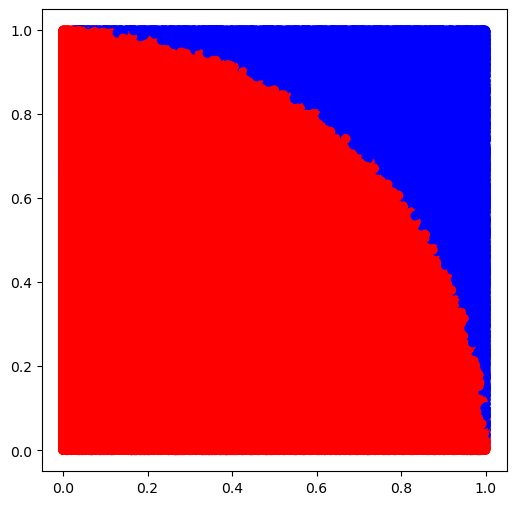

In [5]:
# define figure dimensions
fig, ax = plt.subplots()
fig.set_size_inches(6.0, 6.0)

# plot results
ax.scatter(data[:, 0], data[:, 1], c=data[:, 2])